## Conductivity mass balance for hydrograph separation

### Hungerford Brook, 2022 ISCO dataset

#### Data are from the BREE OneDrive directory (Watershed Data>1_Projects>EMMA>Working file for MATLAB 2023>Data_for_EMMA_2022_HB.csv)

    For HB 2022 ISCO timeseries, 17 parameters total (including dD and d18O)

#### I didn't manipulate the csv in any way, just downloaded from the Sharepoint directory onto my machine. Aim to convert this code to work for 15 min interval SC data from the EXO2 (YSI) sonde, but for now will attempt with ISCO chloride.

#### I also have the 2022 Hungerford potential endmember data (precipitation samples, soil water, and groundwater from well sampling).

#### I also brought in discharge data from https://uvmoffice-my.sharepoint.com/personal/sblocher_uvm_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fsblocher%5Fuvm%5Fedu%2FDocuments%2FBREE%2FWatershed%20Data%2FStreams%2F02%5Fsite%5Fdata%2Fdischarge%2Fbest%5Fq

In [3]:
setwd("/home/millieginty/OneDrive/git-repos/cQ_analysis/")

ERROR: Error in plot_theme(plot): object 'hydrograph_plot' not found


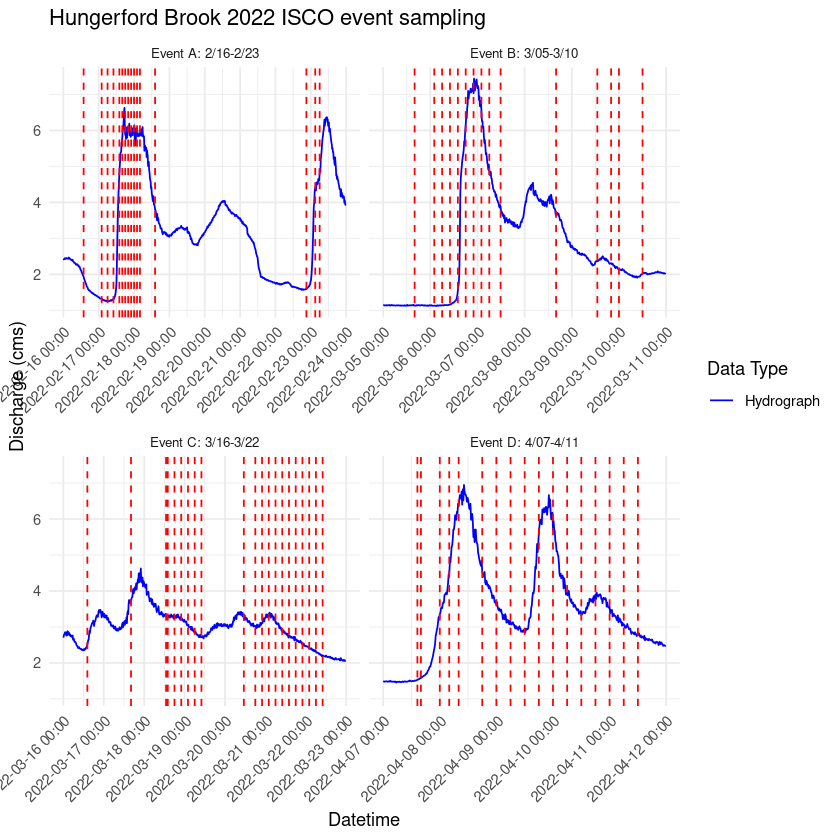

In [4]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/newrnet/data/"
output_dir <- "cond-hydrograph-separation/newrnet/output/"

################
# READ IN DATA #
################

# read in the streamwater ISCO data
InputDataISCO <- read.csv(file.path(input_dir, "Data_for_EMMA_2022_HB.csv"))

# read in the potential endmember data
InputDataEM <- read.csv(file.path(input_dir, "end_members_2022_HB.csv"))

# read in the discharge data
InputDataQ <- read.csv(file.path(input_dir, "hungerford_2022_best_q.csv"))

####################
# CLEAN THE DATA  #
####################

# Convert missing values to NA
InputDataISCO[InputDataISCO == ""] <- NA

# Combine 'Date' and 'Time' columns into 'Datetime' 
InputDataISCO$Datetime <- mdy_hm(paste(InputDataISCO$Date, InputDataISCO$Time))

# Assuming InputDataEM contains Date column in Date format
InputDataEM$Date <- as.Date(InputDataEM$Date, format = "%m/%d/%y")

# Convert 'timestamp' in InputDataQ to proper datetime format
InputDataQ$timestamp <- mdy_hm(InputDataQ$timestamp)

# Convert dataframes to data.table
InputDataISCO_DT <- as.data.table(InputDataISCO)
InputDataQ_DT <- as.data.table(InputDataQ)

# Set keys for joining
setkey(InputDataISCO_DT, Datetime)
setkey(InputDataQ_DT, timestamp)

###############
# JOIN Q DATA #
###############

# Perform a nearest join using data.table
merged_data <- InputDataQ_DT[InputDataISCO_DT, roll = "nearest", on = .(timestamp = Datetime)]

# Save the merged dataframe to a csv
write.csv(merged_data, file.path(output_dir, "merged_data.csv"), row.names = FALSE)

########################
# SEPARATE INTO EVENTS #
########################

# Make sure date formatting all good
merged_data$Date <- as.Date(merged_data$timestamp) # Assuming Datetime is in POSIXct format

# Add Event column based on date ranges
merged_data <- merged_data %>%
  mutate(Event = case_when(
    Date >= as.Date('2022-02-16') & Date <= as.Date('2022-02-23') ~ 'Event A: 2/16-2/23',
    Date >= as.Date('2022-03-05') & Date <= as.Date('2022-03-10') ~ 'Event B: 3/05-3/10',
    Date >= as.Date('2022-03-16') & Date <= as.Date('2022-03-22') ~ 'Event C: 3/16-3/22',
    Date >= as.Date('2022-04-07') & Date <= as.Date('2022-04-11') ~ 'Event D: 4/07-4/11',
    TRUE ~ NA_character_ # Assign NA to dates outside the defined ranges
  ))

# Doing the same as above for the original Q data
InputDataQ$Date <- as.Date(InputDataQ$timestamp)

# Add Event column based on date ranges
InputDataQ <- InputDataQ %>%
  mutate(Event = case_when(
    Date >= as.Date('2022-02-16') & Date <= as.Date('2022-02-23') ~ 'Event A: 2/16-2/23',
    Date >= as.Date('2022-03-05') & Date <= as.Date('2022-03-10') ~ 'Event B: 3/05-3/10',
    Date >= as.Date('2022-03-16') & Date <= as.Date('2022-03-22') ~ 'Event C: 3/16-3/22',
    Date >= as.Date('2022-04-07') & Date <= as.Date('2022-04-11') ~ 'Event D: 4/07-4/11',
    TRUE ~ NA_character_ # Assign NA to dates outside the defined ranges
  ))

# Filter out rows where Event is NA
InputDataQ <- InputDataQ %>%
  filter(!is.na(Event))

#######################
# PLOT THE HYDROGRAPH #
#######################

# include vertical lines for when we have ISCO samples
hydrograph_plot_InputDataQ_with_lines <- ggplot() +
  geom_line(data = InputDataQ, aes(x = timestamp, y = q_cms, color = "Hydrograph")) +
  geom_vline(data = InputDataISCO, aes(xintercept = Datetime), color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Hungerford Brook 2022 ISCO event sampling",
       x = "Datetime",
       y = "Discharge (cms)",
       color = "Data Type") +
  scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~ Event, scales = "free_x") +
  theme(strip.text = element_text(size = 8)) +
  scale_color_manual(values = c("Hydrograph" = "blue")) 

# Print the modified plot
print(hydrograph_plot_InputDataQ_with_lines)

# Save the plot to a file
ggsave(file.path(output_dir, "storm_hydrograph_ISCOs.png"), hydrograph_plot, width = 10, height = 6)

## Conductivity mass balance

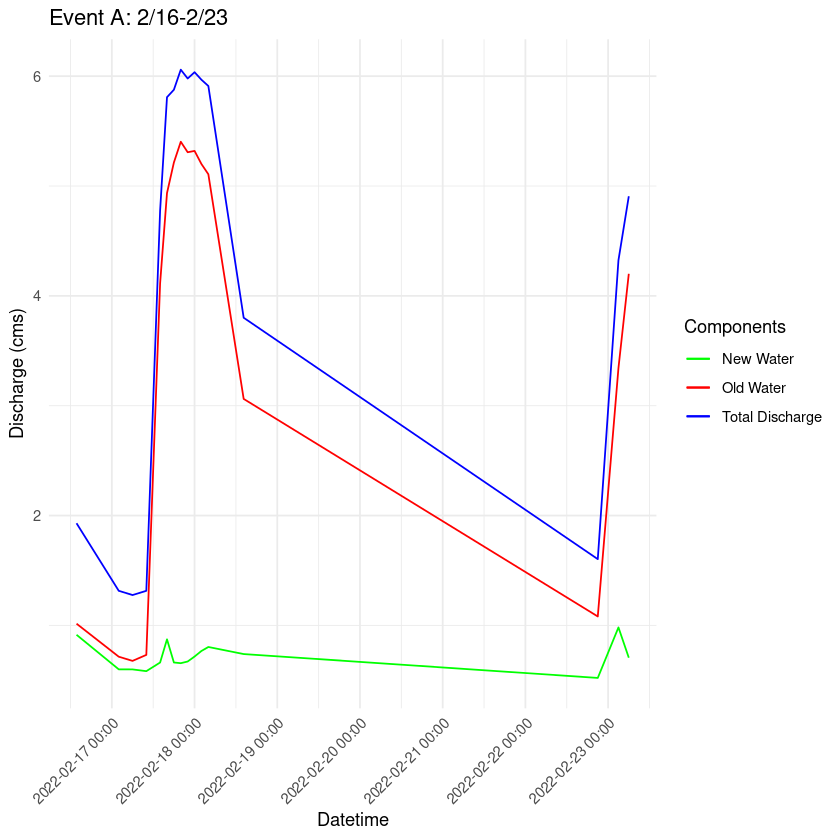

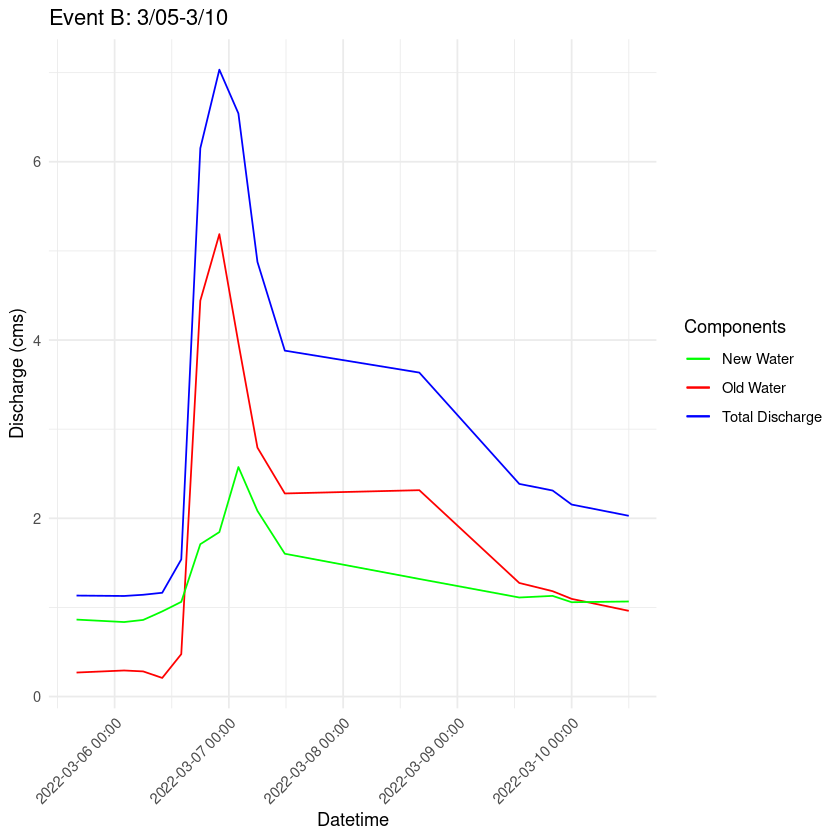

[[1]]

[[2]]

[[3]]

[[4]]


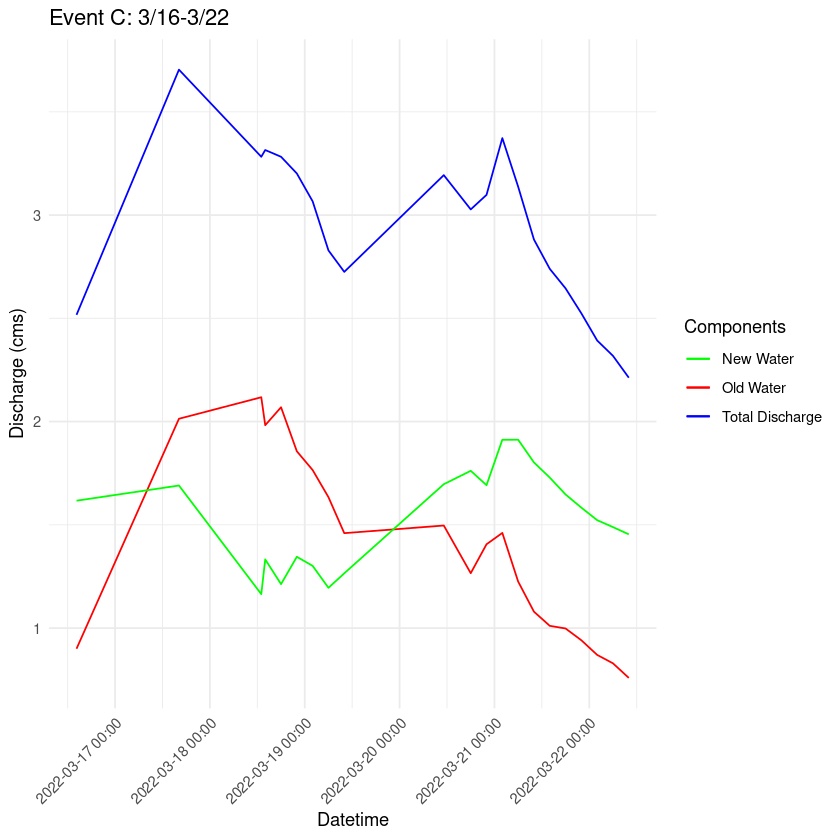

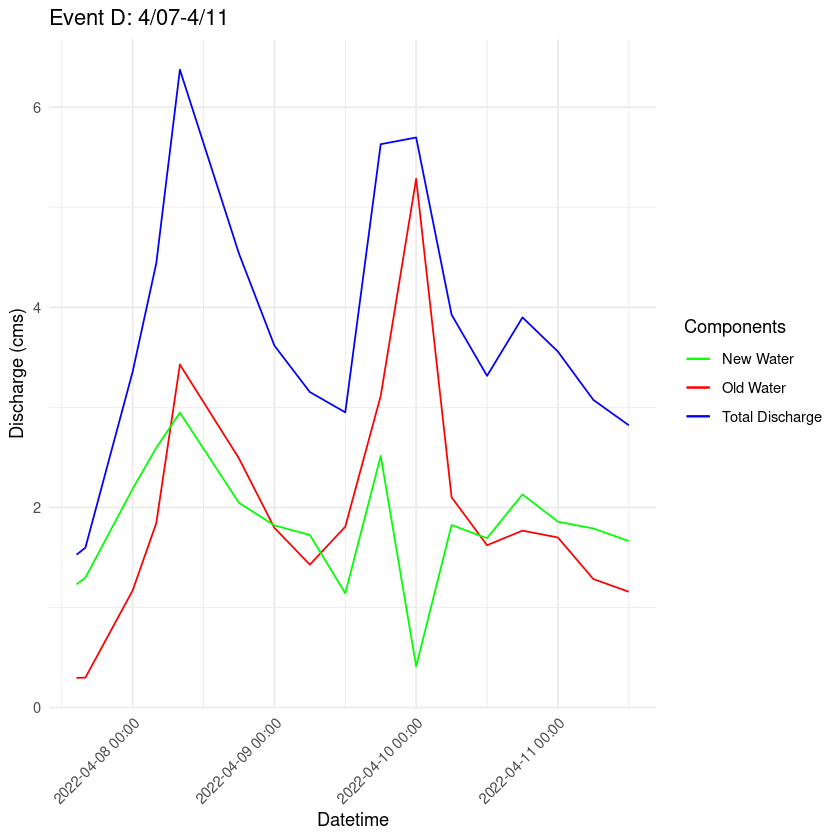

In [59]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/newrnet/data/"
output_dir <- "cond-hydrograph-separation/newrnet/output/"

################
# READ IN DATA #
################

# read in the streamwater ISCO data
InputDataISCO <- read.csv(file.path(input_dir, "Data_for_EMMA_2022_HB.csv"))

# read in the potential endmember data
InputDataEM <- read.csv(file.path(input_dir, "end_members_2022_HB.csv"))

# read in the discharge data
InputDataQ <- read.csv(file.path(input_dir, "hungerford_2022_best_q.csv"))

####################
# CLEAN THE DATA  #
####################

# Convert missing values to NA
InputDataISCO[InputDataISCO == ""] <- NA

# Combine 'Date' and 'Time' columns into 'Datetime' 
InputDataISCO$Datetime <- mdy_hm(paste(InputDataISCO$Date, InputDataISCO$Time))

# Assuming InputDataEM contains Date column in Date format
InputDataEM$Date <- as.Date(InputDataEM$Date, format = "%m/%d/%y")

# Convert 'timestamp' in InputDataQ to proper datetime format
InputDataQ$timestamp <- mdy_hm(InputDataQ$timestamp)

# Convert dataframes to data.table
InputDataISCO_DT <- as.data.table(InputDataISCO)
InputDataQ_DT <- as.data.table(InputDataQ)

# Set keys for joining
setkey(InputDataISCO_DT, Datetime)
setkey(InputDataQ_DT, timestamp)

###############
# JOIN Q DATA #
###############

# Perform a nearest join using data.table
merged_data <- InputDataQ_DT[InputDataISCO_DT, roll = "nearest", on = .(timestamp = Datetime)]

# Save the merged dataframe to a csv
write.csv(merged_data, file.path(output_dir, "merged_data.csv"), row.names = FALSE)

########################
# SEPARATE INTO EVENTS #
########################

# Make sure date formatting all good
merged_data$Date <- as.Date(merged_data$timestamp) # Assuming Datetime is in POSIXct format

# Add Event column based on date ranges
merged_data <- merged_data %>%
  mutate(Event = case_when(
    Date >= as.Date('2022-02-16') & Date <= as.Date('2022-02-23') ~ 'Event A: 2/16-2/23',
    Date >= as.Date('2022-03-05') & Date <= as.Date('2022-03-10') ~ 'Event B: 3/05-3/10',
    Date >= as.Date('2022-03-16') & Date <= as.Date('2022-03-22') ~ 'Event C: 3/16-3/22',
    Date >= as.Date('2022-04-07') & Date <= as.Date('2022-04-11') ~ 'Event D: 4/07-4/11',
    TRUE ~ NA_character_ # Assign NA to dates outside the defined ranges
  ))

# Filter out rows where Event is NA
merged_data <- merged_data %>%
  filter(!is.na(Event))

# Nest data by Event
nested_data <- merged_data %>%
  group_by(Event) %>%
  nest()

# Create a function to calculate new and old water proportions and plot the hydrograph
process_event <- function(data, event_name, InputDataEM) {
  # Set new and old water values based on the event
  if (event_name == "Event A: 2/16-2/23") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-02-15')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event B: 3/05-3/10") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event C: 3/16-3/22") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event D: 4/07-4/11") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else {
    stop("Unknown event")
  }
  
  # Calculate Q_o(t) using Equation 3
  data <- data %>%
    mutate(Q_o = `q_cms` * (`Cl_mg_L` - Event_new) / (Event_old - Event_new),
           Q_n = `q_cms` - Q_o)
  
  # Plot using ggplot2
  hydrograph_plot <- ggplot(data, aes(x = timestamp)) +
    geom_line(aes(y = q_cms, color = "Total Discharge")) +
    geom_line(aes(y = Q_o, color = "Old Water")) +
    geom_line(aes(y = Q_n, color = "New Water")) +
    scale_color_manual(values = c("Total Discharge" = "blue", "Old Water" = "red", "New Water" = "green")) +
    theme_minimal() +
    labs(title = event_name,
         x = "Datetime",
         y = "Discharge (cms)",
         color = "Components") +
    scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Save the plot to a file
  ggsave(file.path(output_dir, paste0("storm_hydrograph_", gsub("[: ]", "_", event_name), ".png")), hydrograph_plot, width = 10, height = 6)
  
  return(hydrograph_plot)
}

# Apply the function to each event
plots <- nested_data %>%
  mutate(plot = map2(data, Event, ~ process_event(.x, .y, InputDataEM)))

# Print all plots
plots$plot

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `plot = map(...)`.
ℹ In group 1: `Event = "Event A: 2/16-2/23"`.
Caused by warning:
! Unknown or uninitialised column: `Event`.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


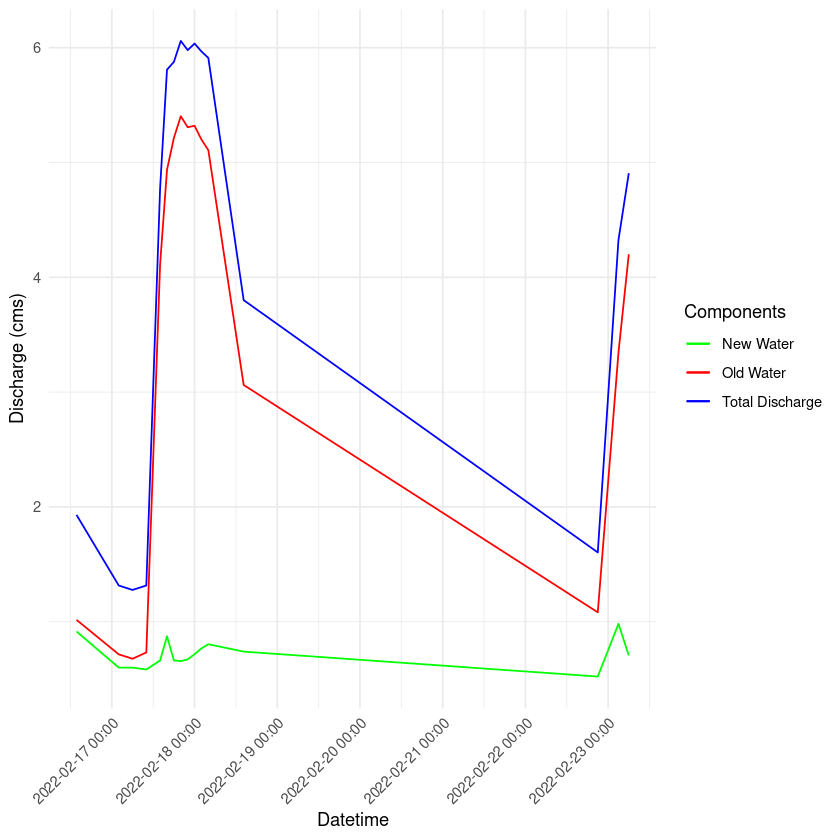

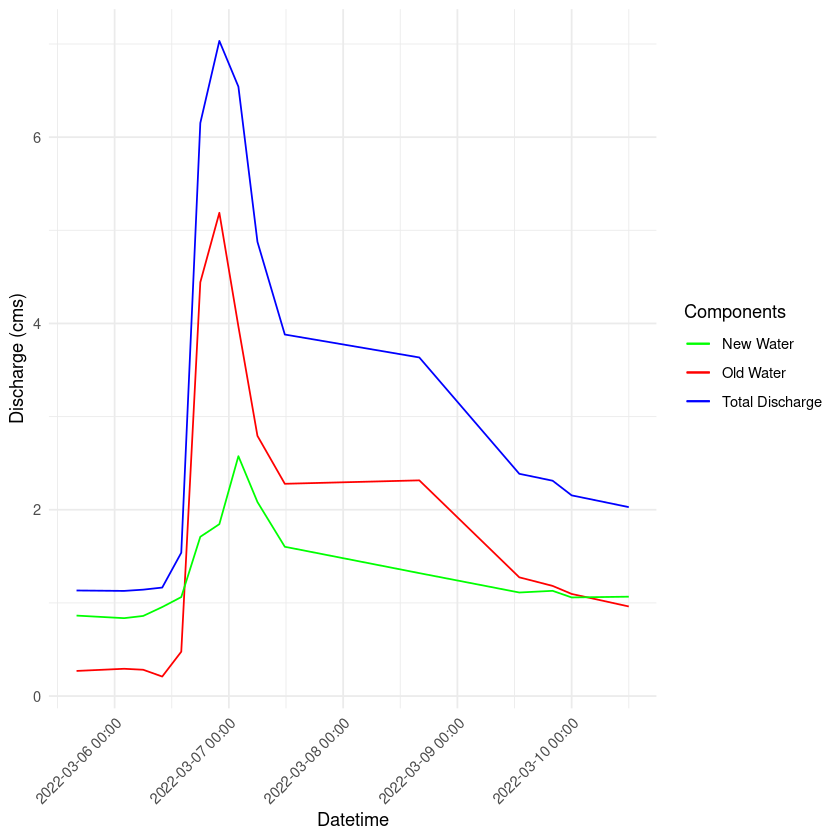

[[1]]

[[2]]

[[3]]

[[4]]


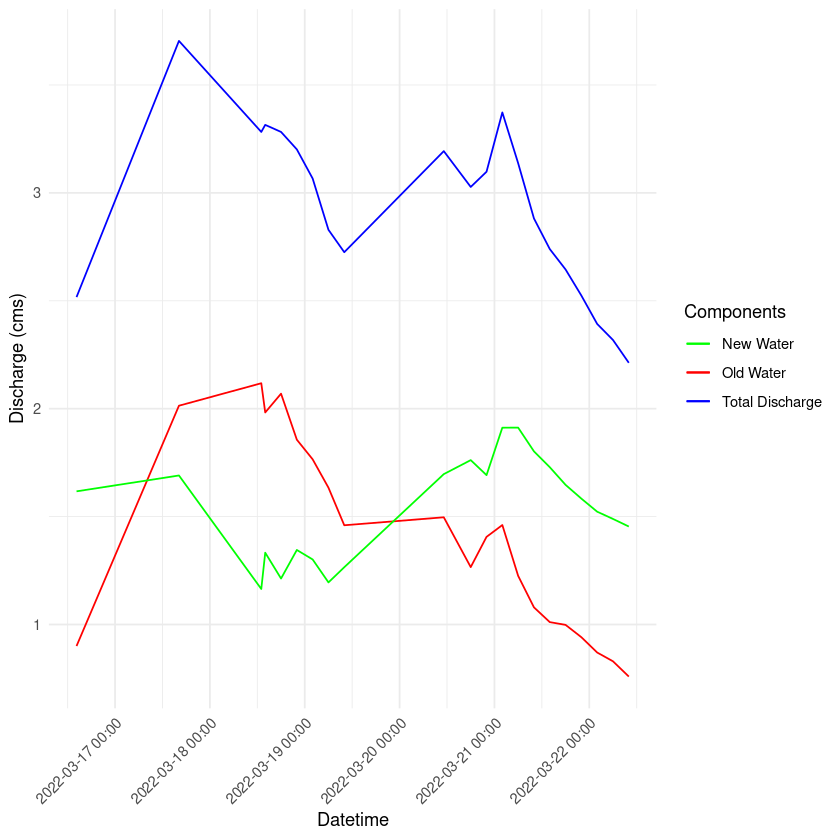

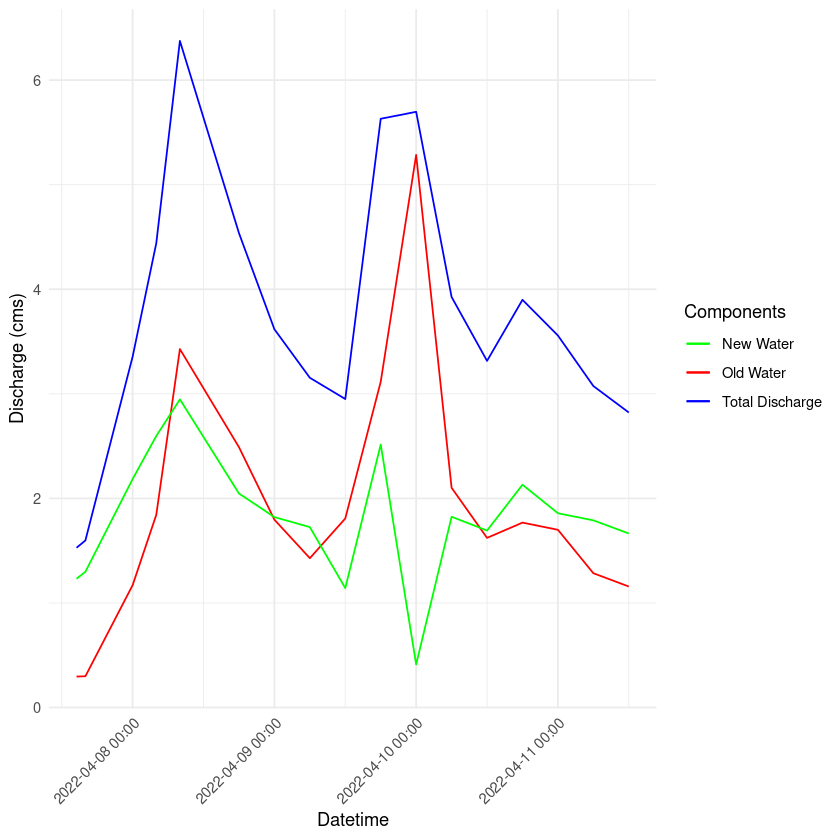

In [65]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/newrnet/data/"
output_dir <- "cond-hydrograph-separation/newrnet/output/"

################
# READ IN DATA #
################

# read in the streamwater ISCO data
InputDataISCO <- read.csv(file.path(input_dir, "Data_for_EMMA_2022_HB.csv"))

# read in the potential endmember data
InputDataEM <- read.csv(file.path(input_dir, "end_members_2022_HB.csv"))

# read in the discharge data
InputDataQ <- read.csv(file.path(input_dir, "hungerford_2022_best_q.csv"))

####################
# CLEAN THE DATA  #
####################

# Convert missing values to NA
InputDataISCO[InputDataISCO == ""] <- NA

# Combine 'Date' and 'Time' columns into 'Datetime' 
InputDataISCO$Datetime <- mdy_hm(paste(InputDataISCO$Date, InputDataISCO$Time))

# Assuming InputDataEM contains Date column in Date format
InputDataEM$Date <- as.Date(InputDataEM$Date, format = "%m/%d/%y")

# Convert 'timestamp' in InputDataQ to proper datetime format
InputDataQ$timestamp <- mdy_hm(InputDataQ$timestamp)

# Convert dataframes to data.table
InputDataISCO_DT <- as.data.table(InputDataISCO)
InputDataQ_DT <- as.data.table(InputDataQ)

# Set keys for joining
setkey(InputDataISCO_DT, Datetime)
setkey(InputDataQ_DT, timestamp)

###############
# JOIN Q DATA #
###############

# Perform a nearest join using data.table
merged_data <- InputDataQ_DT[InputDataISCO_DT, roll = "nearest", on = .(timestamp = Datetime)]

# Save the merged dataframe to a csv
write.csv(merged_data, file.path(output_dir, "merged_data.csv"), row.names = FALSE)

########################
# SEPARATE INTO EVENTS #
########################

# Make sure date formatting all good
merged_data$Date <- as.Date(merged_data$timestamp) # Assuming Datetime is in POSIXct format

# Add Event column based on date ranges
merged_data <- merged_data %>%
  mutate(Event = case_when(
    Date >= as.Date('2022-02-16') & Date <= as.Date('2022-02-23') ~ 'Event A: 2/16-2/23',
    Date >= as.Date('2022-03-05') & Date <= as.Date('2022-03-10') ~ 'Event B: 3/05-3/10',
    Date >= as.Date('2022-03-16') & Date <= as.Date('2022-03-22') ~ 'Event C: 3/16-3/22',
    Date >= as.Date('2022-04-07') & Date <= as.Date('2022-04-11') ~ 'Event D: 4/07-4/11',
    TRUE ~ NA_character_ # Assign NA to dates outside the defined ranges
  ))

# Filter out rows where Event is NA
merged_data <- merged_data %>%
  filter(!is.na(Event))

# Nest data by Event
nested_data <- merged_data %>%
  group_by(Event) %>%
  nest()

# Create a function to calculate new and old water proportions, plot the hydrograph, and calculate volumes
process_event <- function(data, event_name, InputDataEM) {
  # Set new and old water values based on the event
  if (event_name == "Event A: 2/16-2/23") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-02-15')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event B: 3/05-3/10") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event C: 3/16-3/22") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event D: 4/07-4/11") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Groundwater" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
  } else {
    stop("Unknown event")
  }
  
  # Calculate Q_o(t) using Equation 3
  data <- data %>%
    mutate(Q_o = `q_cms` * (`Cl_mg_L` - Event_new) / (Event_old - Event_new),
           Q_n = `q_cms` - Q_o)
  
  # Calculate the volumes of old and new water
  volume_old <- trapz(as.numeric(data$timestamp), data$Q_o)
  volume_new <- trapz(as.numeric(data$timestamp), data$Q_n)
  
  # Add volumes to data
  data <- data %>%
    mutate(Volume_Old = volume_old,
           Volume_New = volume_new)
  
  # Plot using ggplot2
  hydrograph_plot <- ggplot(data, aes(x = timestamp)) +
    geom_line(aes(y = q_cms, color = "Total Discharge")) +
    geom_line(aes(y = Q_o, color = "Old Water")) +
    geom_line(aes(y = Q_n, color = "New Water")) +
    scale_color_manual(values = c("Total Discharge" = "blue", "Old Water" = "red", "New Water" = "green")) +
    theme_minimal() +
    labs(title = event_name,
         x = "Datetime",
         y = "Discharge (cms)",
         color = "Components") +
    scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Save the plot to a file
  ggsave(file.path(output_dir, paste0("storm_hydrograph_", gsub("[: ]", "_", event_name), ".png")), hydrograph_plot, width = 10, height = 6)
  
  return(data)
}

# Apply the function to each event and store the results
results <- nested_data %>%
  mutate(data = map2(data, Event, ~ process_event(.x, .y, InputDataEM)))

# Unnest the results and save to CSV
unnested_results <- results %>%
  unnest(cols = c(data))

write.csv(unnested_results, file.path(output_dir, "new_old_water_proportions.csv"), row.names = FALSE)

# Print the plots
plots <- results %>%
  mutate(plot = map(data, ~ ggplot(.x, aes(x = timestamp)) +
                      geom_line(aes(y = q_cms, color = "Total Discharge")) +
                      geom_line(aes(y = Q_o, color = "Old Water")) +
                      geom_line(aes(y = Q_n, color = "New Water")) +
                      scale_color_manual(values = c("Total Discharge" = "blue", "Old Water" = "red", "New Water" = "green")) +
                      theme_minimal() +
                      labs(title = .x$Event[1],
                           x = "Datetime",
                           y = "Discharge (cms)",
                           color = "Components") +
                      scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
                      theme(axis.text.x = element_text(angle = 45, hjust = 1))))

# Print all plots
plots$plot

## With baseflow as old water EM

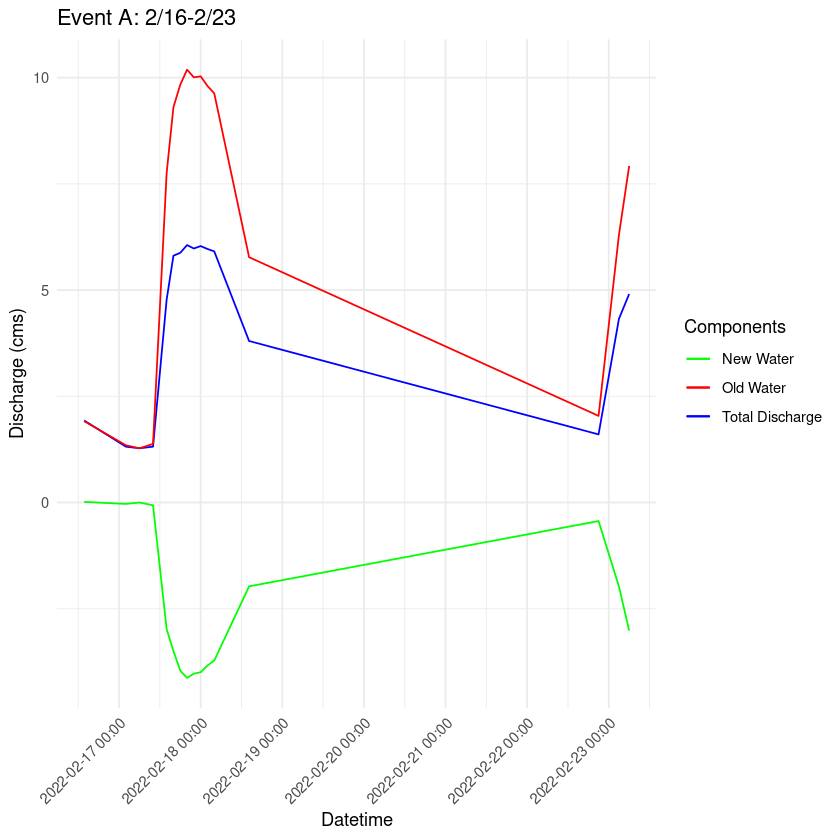

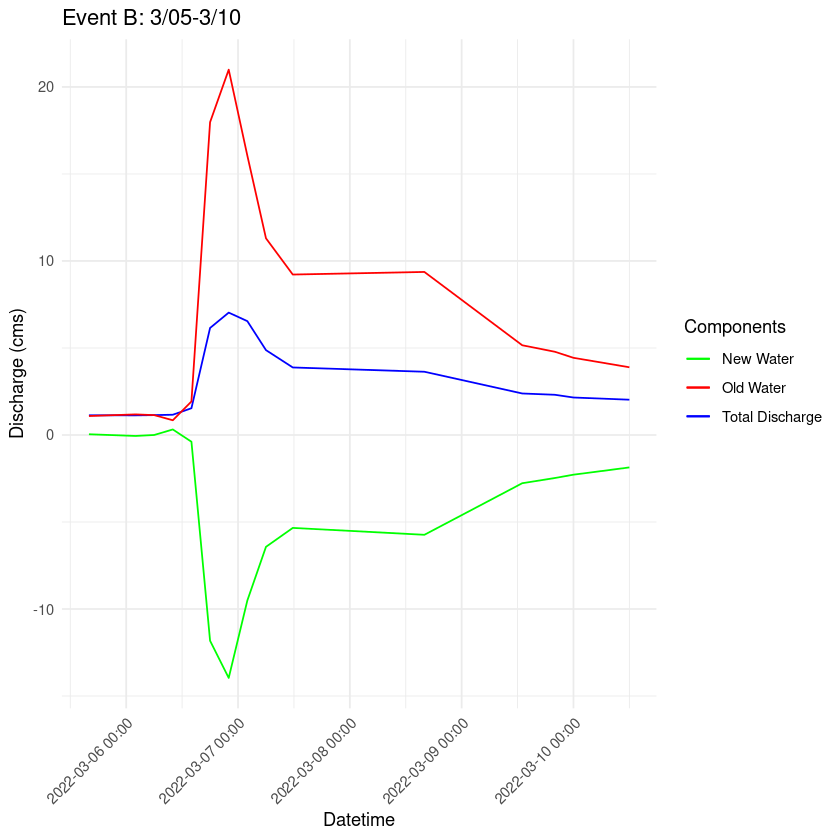

[[1]]

[[2]]

[[3]]

[[4]]


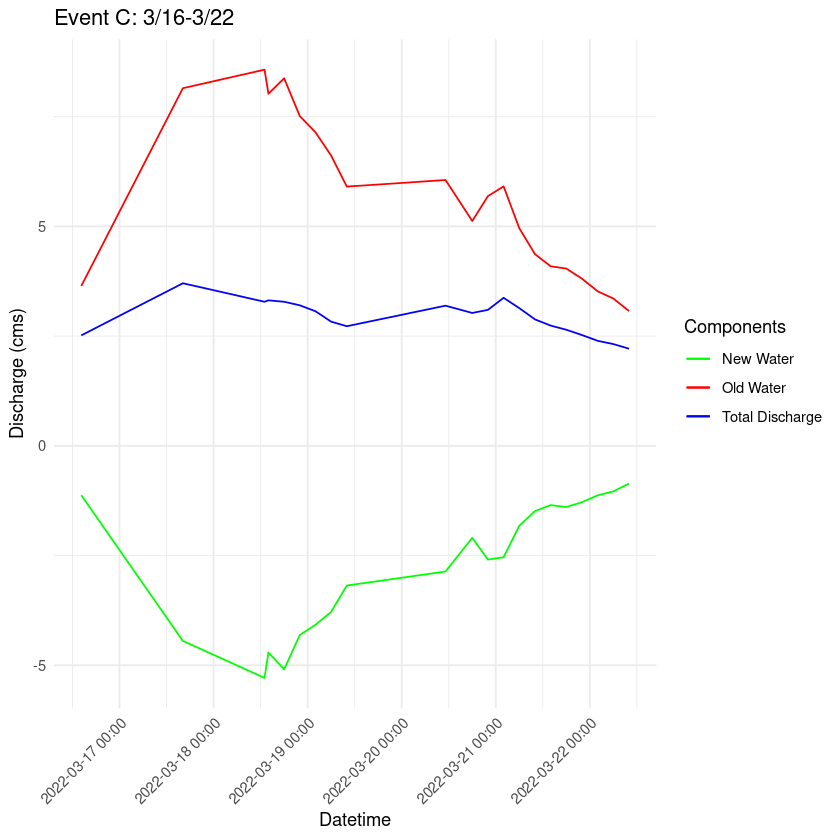

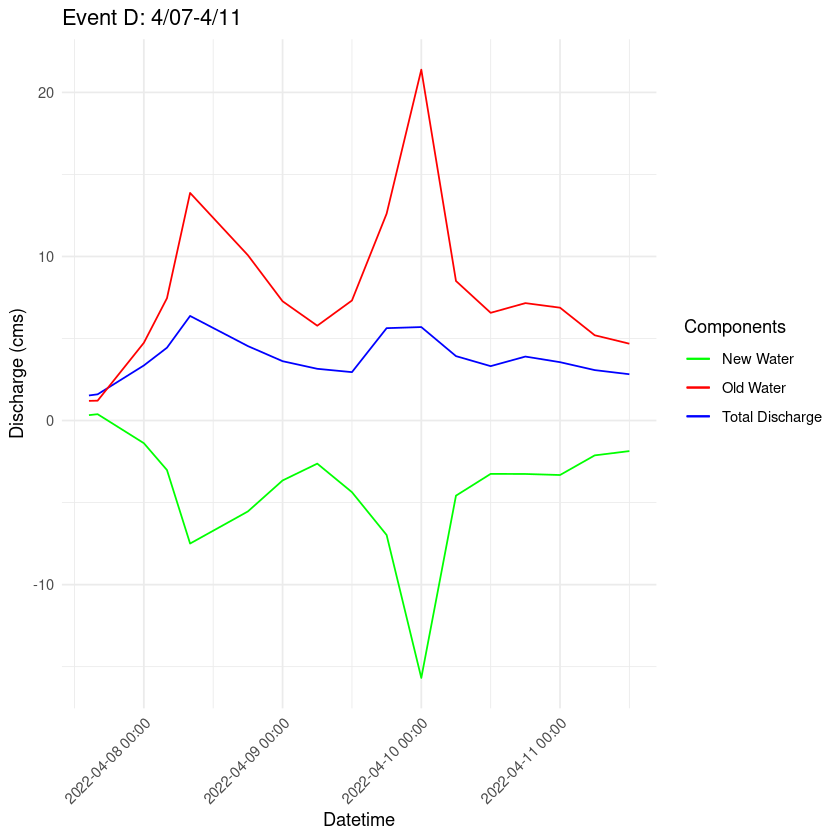

In [66]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/newrnet/data/"
output_dir <- "cond-hydrograph-separation/newrnet/output/"

################
# READ IN DATA #
################

# read in the streamwater ISCO data
InputDataISCO <- read.csv(file.path(input_dir, "Data_for_EMMA_2022_HB.csv"))

# read in the potential endmember data
InputDataEM <- read.csv(file.path(input_dir, "end_members_2022_HB.csv"))

# read in the discharge data
InputDataQ <- read.csv(file.path(input_dir, "hungerford_2022_best_q.csv"))

####################
# CLEAN THE DATA  #
####################

# Convert missing values to NA
InputDataISCO[InputDataISCO == ""] <- NA

# Combine 'Date' and 'Time' columns into 'Datetime' 
InputDataISCO$Datetime <- mdy_hm(paste(InputDataISCO$Date, InputDataISCO$Time))

# Assuming InputDataEM contains Date column in Date format
InputDataEM$Date <- as.Date(InputDataEM$Date, format = "%m/%d/%y")

# Convert 'timestamp' in InputDataQ to proper datetime format
InputDataQ$timestamp <- mdy_hm(InputDataQ$timestamp)

# Convert dataframes to data.table
InputDataISCO_DT <- as.data.table(InputDataISCO)
InputDataQ_DT <- as.data.table(InputDataQ)

# Set keys for joining
setkey(InputDataISCO_DT, Datetime)
setkey(InputDataQ_DT, timestamp)

###############
# JOIN Q DATA #
###############

# Perform a nearest join using data.table
merged_data <- InputDataQ_DT[InputDataISCO_DT, roll = "nearest", on = .(timestamp = Datetime)]

# Save the merged dataframe to a csv
write.csv(merged_data, file.path(output_dir, "merged_data.csv"), row.names = FALSE)

########################
# SEPARATE INTO EVENTS #
########################

# Make sure date formatting all good
merged_data$Date <- as.Date(merged_data$timestamp) # Assuming Datetime is in POSIXct format

# Add Event column based on date ranges
merged_data <- merged_data %>%
  mutate(Event = case_when(
    Date >= as.Date('2022-02-16') & Date <= as.Date('2022-02-23') ~ 'Event A: 2/16-2/23',
    Date >= as.Date('2022-03-05') & Date <= as.Date('2022-03-10') ~ 'Event B: 3/05-3/10',
    Date >= as.Date('2022-03-16') & Date <= as.Date('2022-03-22') ~ 'Event C: 3/16-3/22',
    Date >= as.Date('2022-04-07') & Date <= as.Date('2022-04-11') ~ 'Event D: 4/07-4/11',
    TRUE ~ NA_character_ # Assign NA to dates outside the defined ranges
  ))

# Filter out rows where Event is NA
merged_data <- merged_data %>%
  filter(!is.na(Event))

# Nest data by Event
nested_data <- merged_data %>%
  group_by(Event) %>%
  nest()

# Create a function to calculate new and old water proportions and plot the hydrograph
process_event <- function(data, event_name, InputDataEM) {
  # Set new and old water values based on the event
  if (event_name == "Event A: 2/16-2/23") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-02-15')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-02-17')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event B: 3/05-3/10") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-03-06')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event C: 3/16-3/22") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-03-06')) %>%
      pull(Cl_mg_L)
  } else if (event_name == "Event D: 4/07-4/11") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(Cl_mg_L)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-03-06')) %>%
      pull(Cl_mg_L)
  } else {
    stop("Unknown event")
  }
  
  # Calculate Q_o(t) using Equation 3
  data <- data %>%
    mutate(Q_o = `q_cms` * (`Cl_mg_L` - Event_new) / (Event_old - Event_new),
           Q_n = `q_cms` - Q_o)
  
  # Plot using ggplot2
  hydrograph_plot <- ggplot(data, aes(x = timestamp)) +
    geom_line(aes(y = q_cms, color = "Total Discharge")) +
    geom_line(aes(y = Q_o, color = "Old Water")) +
    geom_line(aes(y = Q_n, color = "New Water")) +
    scale_color_manual(values = c("Total Discharge" = "blue", "Old Water" = "red", "New Water" = "green")) +
    theme_minimal() +
    labs(title = event_name,
         x = "Datetime",
         y = "Discharge (cms)",
         color = "Components") +
    scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Save the plot to a file
  ggsave(file.path(output_dir, paste0("storm_hydrograph_", gsub("[: ]", "_", event_name), ".png")), hydrograph_plot, width = 10, height = 6)
  
  return(hydrograph_plot)
}

# Apply the function to each event
plots <- nested_data %>%
  mutate(plot = map2(data, Event, ~ process_event(.x, .y, InputDataEM)))

# Print all plots
plots$plot

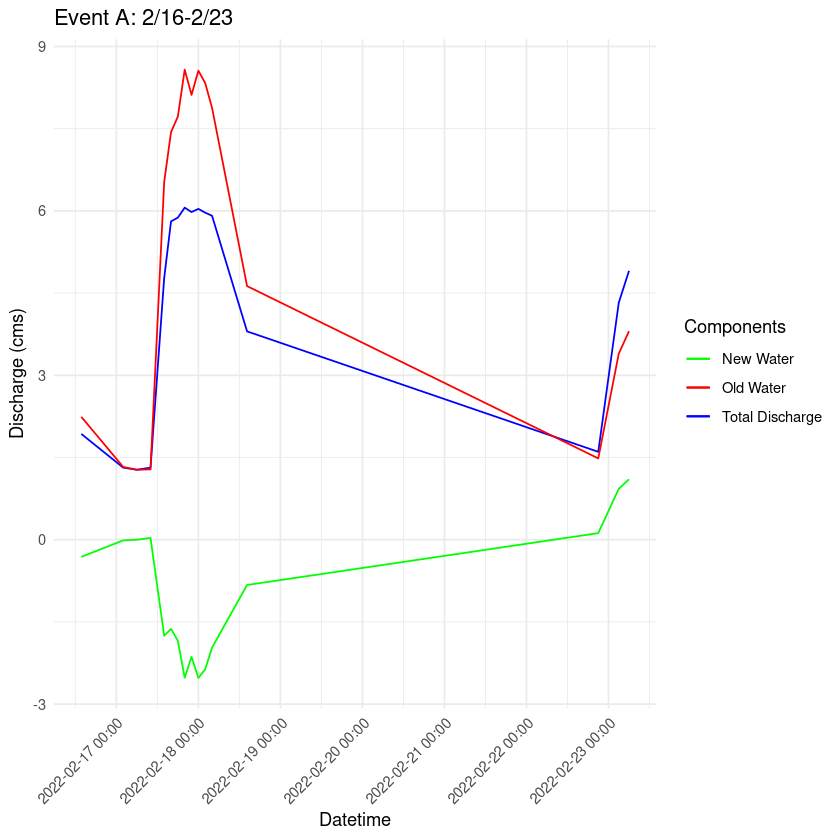

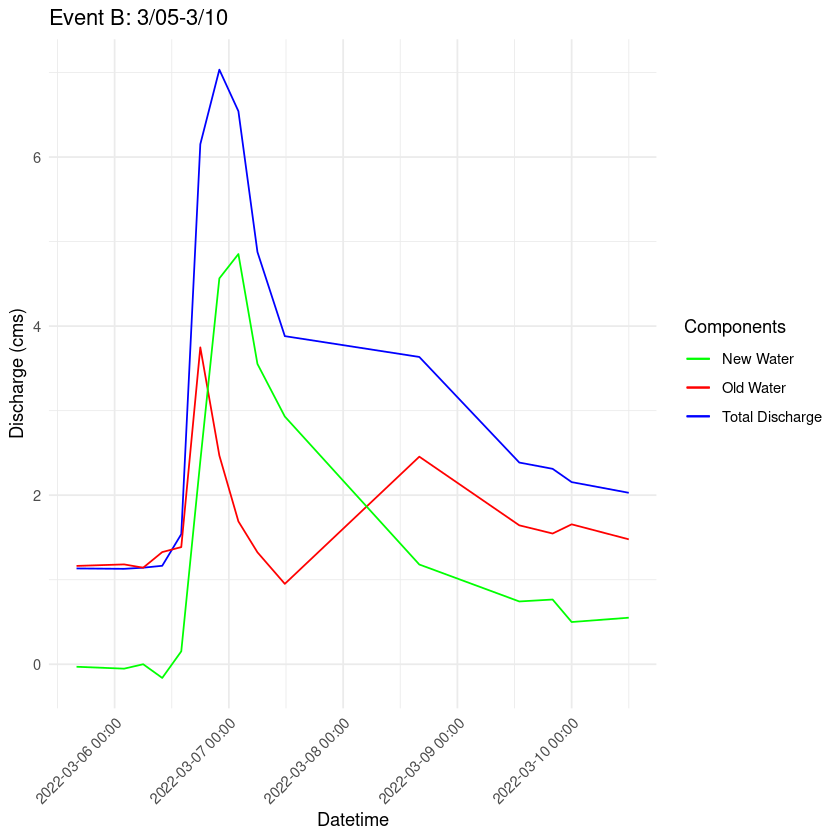

[[1]]

[[2]]

[[3]]

[[4]]


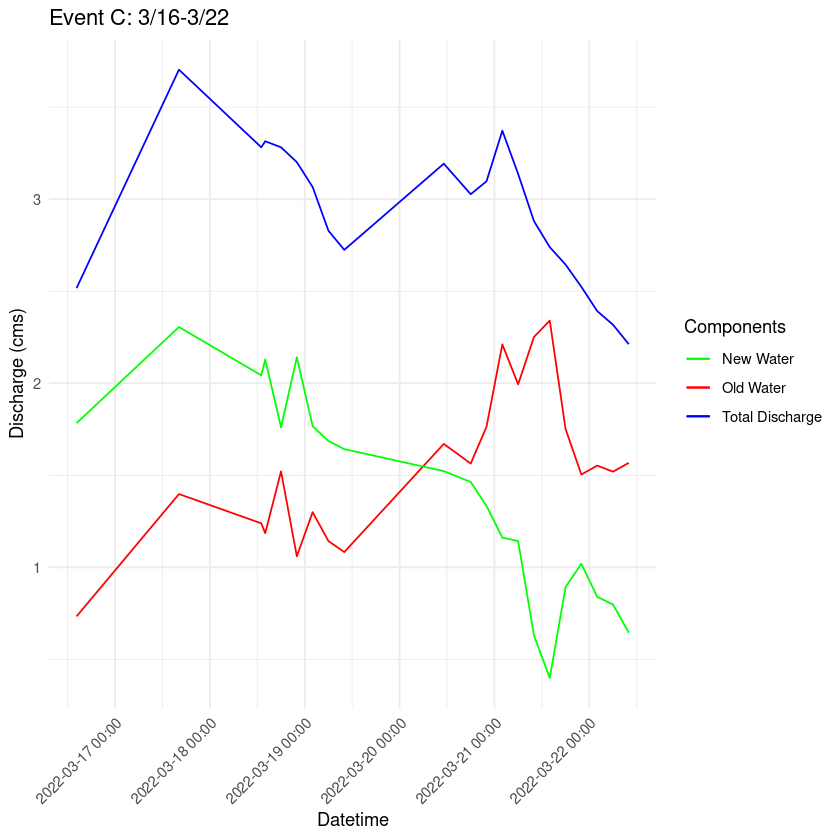

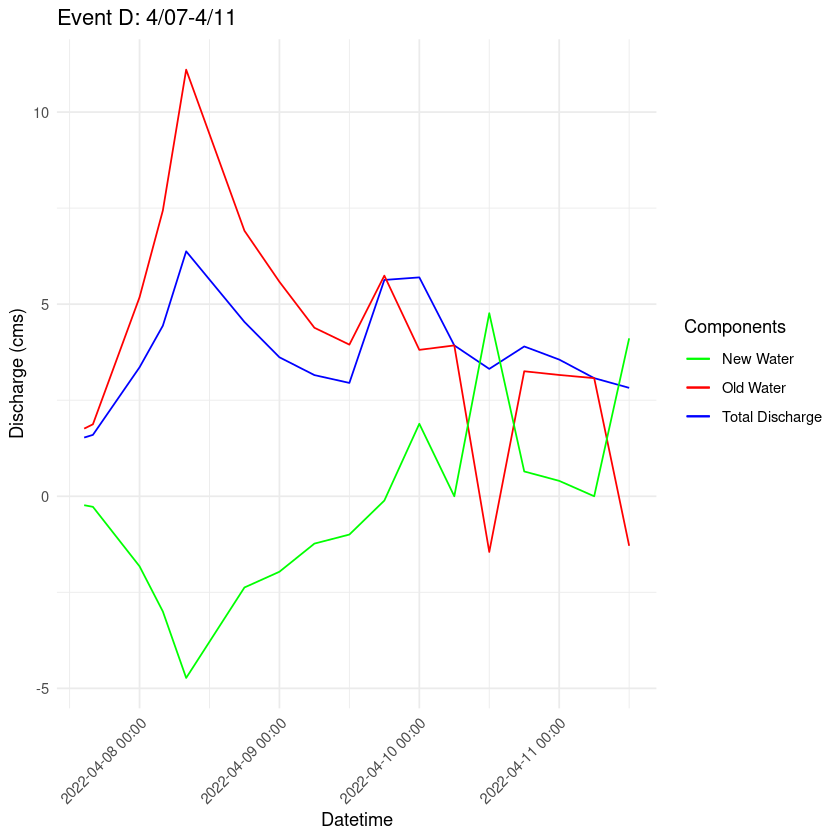

In [67]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/newrnet/data/"
output_dir <- "cond-hydrograph-separation/newrnet/output/"

################
# READ IN DATA #
################

# read in the streamwater ISCO data
InputDataISCO <- read.csv(file.path(input_dir, "Data_for_EMMA_2022_HB.csv"))

# read in the potential endmember data
InputDataEM <- read.csv(file.path(input_dir, "end_members_2022_HB.csv"))

# read in the discharge data
InputDataQ <- read.csv(file.path(input_dir, "hungerford_2022_best_q.csv"))

####################
# CLEAN THE DATA  #
####################

# Convert missing values to NA
InputDataISCO[InputDataISCO == ""] <- NA

# Combine 'Date' and 'Time' columns into 'Datetime' 
InputDataISCO$Datetime <- mdy_hm(paste(InputDataISCO$Date, InputDataISCO$Time))

# Assuming InputDataEM contains Date column in Date format
InputDataEM$Date <- as.Date(InputDataEM$Date, format = "%m/%d/%y")

# Convert 'timestamp' in InputDataQ to proper datetime format
InputDataQ$timestamp <- mdy_hm(InputDataQ$timestamp)

# Convert dataframes to data.table
InputDataISCO_DT <- as.data.table(InputDataISCO)
InputDataQ_DT <- as.data.table(InputDataQ)

# Set keys for joining
setkey(InputDataISCO_DT, Datetime)
setkey(InputDataQ_DT, timestamp)

###############
# JOIN Q DATA #
###############

# Perform a nearest join using data.table
merged_data <- InputDataQ_DT[InputDataISCO_DT, roll = "nearest", on = .(timestamp = Datetime)]

# Save the merged dataframe to a csv
write.csv(merged_data, file.path(output_dir, "merged_data.csv"), row.names = FALSE)

########################
# SEPARATE INTO EVENTS #
########################

# Make sure date formatting all good
merged_data$Date <- as.Date(merged_data$timestamp) # Assuming Datetime is in POSIXct format

# Add Event column based on date ranges
merged_data <- merged_data %>%
  mutate(Event = case_when(
    Date >= as.Date('2022-02-16') & Date <= as.Date('2022-02-23') ~ 'Event A: 2/16-2/23',
    Date >= as.Date('2022-03-05') & Date <= as.Date('2022-03-10') ~ 'Event B: 3/05-3/10',
    Date >= as.Date('2022-03-16') & Date <= as.Date('2022-03-22') ~ 'Event C: 3/16-3/22',
    Date >= as.Date('2022-04-07') & Date <= as.Date('2022-04-11') ~ 'Event D: 4/07-4/11',
    TRUE ~ NA_character_ # Assign NA to dates outside the defined ranges
  ))

# Filter out rows where Event is NA
merged_data <- merged_data %>%
  filter(!is.na(Event))

# Nest data by Event
nested_data <- merged_data %>%
  group_by(Event) %>%
  nest()

# Create a function to calculate new and old water proportions and plot the hydrograph
process_event <- function(data, event_name, InputDataEM) {
  # Set new and old water values based on the event
  if (event_name == "Event A: 2/16-2/23") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-02-15')) %>%
      pull(d18O)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-02-17')) %>%
      pull(d18O)
  } else if (event_name == "Event B: 3/05-3/10") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(d18O)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-03-06')) %>%
      pull(d18O)
  } else if (event_name == "Event C: 3/16-3/22") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(d18O)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-03-06')) %>%
      pull(d18O)
  } else if (event_name == "Event D: 4/07-4/11") {
    Event_new <- InputDataEM %>%
      filter(Type == "Snow lysimeter" & Date == as.Date('2022-03-17')) %>%
      pull(d18O)
    
    Event_old <- InputDataEM %>%
      filter(Type == "Baseflow ISCO" & Date == as.Date('2022-03-06')) %>%
      pull(d18O)
  } else {
    stop("Unknown event")
  }
  
  # Calculate Q_o(t) using Equation 3
  data <- data %>%
    mutate(Q_o = `q_cms` * (`d18O` - Event_new) / (Event_old - Event_new),
           Q_n = `q_cms` - Q_o)
  
  # Plot using ggplot2
  hydrograph_plot <- ggplot(data, aes(x = timestamp)) +
    geom_line(aes(y = q_cms, color = "Total Discharge")) +
    geom_line(aes(y = Q_o, color = "Old Water")) +
    geom_line(aes(y = Q_n, color = "New Water")) +
    scale_color_manual(values = c("Total Discharge" = "blue", "Old Water" = "red", "New Water" = "green")) +
    theme_minimal() +
    labs(title = event_name,
         x = "Datetime",
         y = "Discharge (cms)",
         color = "Components") +
    scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Save the plot to a file
  ggsave(file.path(output_dir, paste0("storm_hydrograph_", gsub("[: ]", "_", event_name), ".png")), hydrograph_plot, width = 10, height = 6)
  
  return(hydrograph_plot)
}

# Apply the function to each event
plots <- nested_data %>%
  mutate(plot = map2(data, Event, ~ process_event(.x, .y, InputDataEM)))

# Print all plots
plots$plot